## عاطفه محمدی

project name : lungs classification <br>
aim of project: to train a neural network (using keras) on a dataset of lung's pictures in order to classify whether it is COVID19, PNEUMONIA or a normal lung.

copy and unzip dataset

In [1]:
!cp "/content/drive/MyDrive/xray.zip" .

In [ ]:
! unzip xray.zip

import libraries

In [3]:
from tensorflow.keras import *
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.metrics import classification_report

# 1

loading dataset

In [4]:
def data_loader(batch_size=32, scale=None):
  data_generator = preprocessing.image.ImageDataGenerator(rescale=scale)

  train_data = data_generator.flow_from_directory("/content/Data/train",
                                                target_size=(80,80),
                                                color_mode='grayscale',
                                                batch_size=batch_size)
  test_data = data_generator.flow_from_directory("/content/Data/test",
                                                target_size=(80,80),
                                                color_mode='grayscale',
                                                batch_size=batch_size)
  return train_data, test_data

In [5]:
train_data, test_data = data_loader(32)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


# 2

In [6]:
covid = os.path.join('/content/Data/train/COVID19', os.listdir('/content/Data/train/COVID19')[0])
normal = os.path.join('/content/Data/train/NORMAL', os.listdir('/content/Data/train/NORMAL')[0])
pneumonia = os.path.join('/content/Data/train/PNEUMONIA', os.listdir('/content/Data/train/PNEUMONIA')[0])

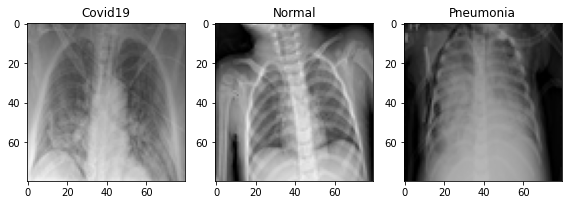

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(8,5))

img1 = Image.open(covid)
img1 = img1.resize((80,80), Image.ANTIALIAS)
axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Covid19')

img2 = Image.open(normal)
img2 = img2.resize((80,80), Image.ANTIALIAS)
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Normal')

img3 = Image.open(pneumonia)
img3 = img3.resize((80,80), Image.ANTIALIAS)
axes[2].imshow(img3, cmap='gray')
axes[2].set_title('Pneumonia')
plt.tight_layout()

In [8]:
size = []
for folder in os.listdir('/content/Data/train'):
  dir = os.path.join('/content/Data/train', folder)
  size.append(len([pic for pic in os.listdir(dir)]))
  print(folder)
  print(size)

COVID19
[460]
NORMAL
[460, 1266]
PNEUMONIA
[460, 1266, 3418]


<BarContainer object of 3 artists>

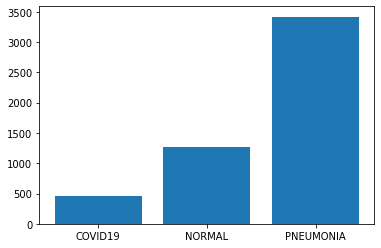

In [9]:
plt.bar(os.listdir('/content/Data/train'), size)

# 3

In [10]:
def nn_model(input_shape, output_shape, activation, optimizer, loss, regularize=None):
  inp = layers.Input(input_shape)
  out = layers.Flatten()(inp)
  out = layers.Dense(1024, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(2048, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(1024, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(output_shape, 'softmax', kernel_regularizer=regularize)(out)

  model = models.Model(inputs=inp, outputs=out)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [11]:
my_model = nn_model((80,80,1), 3, 'relu', optimizers.SGD(0.01), losses.CategoricalCrossentropy())

In [12]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6554624   
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              2099200   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3075      
Total params: 10,755,075
Trainable params: 10,755,075
Non-trainable params: 0
_________________________________________________

there are around 10 million parameters in this model. <br>
about 6 million in the first hidden layer, 2 million in the second hidden layer and 2 million in the third hidden layer.

# 4

## Relu

In [13]:
report = my_model.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 145s 896ms/step - loss: nan - accuracy: 0.1219 - val_loss: nan - val_accuracy: 0.0901
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0901
Epoch 3/10
161/161 [==============================] - 144s 897ms/step - loss: nan - accuracy: 0.0883 - val_loss: nan - val_accuracy: 0.0901
Epoch 4/10
161/161 [==============================] - 145s 900ms/step - loss: nan - accuracy: 0.0955 - val_loss: nan - val_accuracy: 0.0901
Epoch 5/10
161/161 [==============================] - 144s 893ms/step - loss: nan - accuracy: 0.0899 - val_loss: nan - val_accuracy: 0.0901
Epoch 6/10
161/161 [==============================] - 144s 898ms/step - loss: nan - accuracy: 0.0833 - val_loss: nan - val_accuracy: 0.0901
Epoch 7/10
161/161 [==============================] - 144s 896ms/step - loss: nan - accuracy: 0.0920 - val_loss: nan - val_accuracy: 0.0901
Epoch 8/10
161/161 [

In [14]:
# report.history

In [15]:
def plot_loss(history):
  fig, axes = plt.subplots(1, 2, figsize=(8,5))
  
  axes[0].plot(history.history['accuracy'], color='r', label='train')
  axes[0].plot(history.history['val_accuracy'], color='b', label='test')
  axes[0].set_title('model accuracy')
  axes[0].set_ylabel('accuracy')
  axes[0].set_xlabel('epoch')
  axes[0].legend(loc='best')
  
  axes[1].plot(history.history['loss'], color='orange', label='train')
  axes[1].plot(history.history['val_loss'], color='green', label='test')
  axes[1].set_title('model loss')
  axes[1].set_ylabel('loss')
  axes[1].set_xlabel('epoch')
  axes[1].legend(loc='best')

  fig.tight_layout()

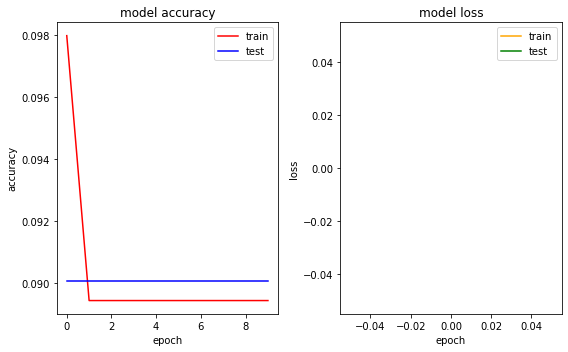

In [16]:
plot_loss(report)

the right plot is empty because we got losses with Nan value on this train

In [17]:
def get_true_label(loader):
  labels = []
  total_batches = int(np.ceil(len(loader.classes) / loader.batch_size))
  for i in range(total_batches):
    x, y = loader.next()
    for label in y:
      labels.append(backend.argmax(label))
  return np.array(labels)

In [18]:
predicted_labels = my_model.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

              precision    recall  f1-score   support

           0       0.09      1.00      0.17       116
           1       0.00      0.00      0.00       317
           2       0.00      0.00      0.00       855

    accuracy                           0.09      1288
   macro avg       0.03      0.33      0.06      1288
weighted avg       0.01      0.09      0.01      1288



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Tanh

In [19]:
model_tanh = nn_model((80,80,1), 3, 'tanh', optimizers.SGD(0.01), losses.CategoricalCrossentropy())

In [20]:
report_tanh = model_tanh.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)

Epoch 1/10
161/161 [==============================] - 145s 901ms/step - loss: 1.7374 - accuracy: 0.5378 - val_loss: 0.9040 - val_accuracy: 0.6638
Epoch 2/10
161/161 [==============================] - 144s 897ms/step - loss: 0.9480 - accuracy: 0.6183 - val_loss: 1.2476 - val_accuracy: 0.2461
Epoch 3/10
161/161 [==============================] - 144s 894ms/step - loss: 0.9568 - accuracy: 0.6014 - val_loss: 0.8563 - val_accuracy: 0.6638
Epoch 4/10
161/161 [==============================] - 144s 896ms/step - loss: 0.9019 - accuracy: 0.6312 - val_loss: 0.8950 - val_accuracy: 0.6638
Epoch 5/10
161/161 [==============================] - 144s 898ms/step - loss: 0.8863 - accuracy: 0.6343 - val_loss: 0.8337 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 144s 897ms/step - loss: 0.8772 - accuracy: 0.6487 - val_loss: 0.8798 - val_accuracy: 0.6638
Epoch 7/10
161/161 [==============================] - 144s 891ms/step - loss: 0.8491 - accuracy: 0.6605 - val_loss: 0.8401 -

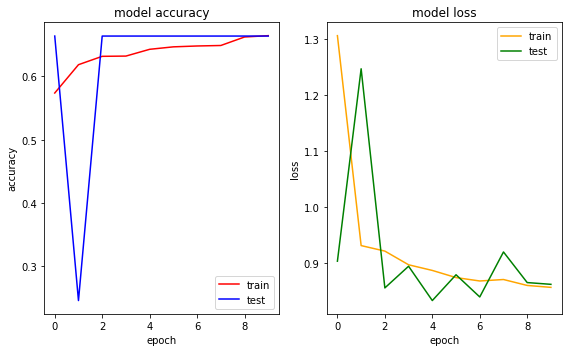

In [21]:
plot_loss(report_tanh)

دیتای ورودی به دو مدل بالا عکس هایی هستند که مقادیر پیکسل های آن ها بین 0 تا 255 است، یعنی مقدار مثبت دارند. در قسمت اول که از تابع رلو استفاده کرده ایم، این تابع برای مقادیر مثبت، خود همان مقدار را بر می گرداند. یعنی به طور صعودی در حال افزایش است. اما در مورد قسمت دوم، تابع تانژانت هایپربولیک برای مقادیر مثبت هم مقدارش بیشتر از یک نمی شود. به همین علت است در در قسمت اول پرفورمنس بدتری نسبت به قسمت دوم داشته ایم.

نکته مشترک هر دو قسمت این است که پرفورمنس بسیار ضعیف بوده و مقادیر دقت پایین هستند که به علت نرمالایز نکردن داده های ورودی می باشد.

# 5

In [25]:
train_data, test_data = data_loader(32, 1.0/255.0)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [26]:
tmp_model = nn_model((80,80,1), 3, 'relu', optimizers.SGD(0.01), losses.CategoricalCrossentropy())
report = tmp_model.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = tmp_model.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 143s 889ms/step - loss: 0.6352 - accuracy: 0.7310 - val_loss: 0.3136 - val_accuracy: 0.8921
Epoch 2/10
161/161 [==============================] - 142s 882ms/step - loss: 0.4151 - accuracy: 0.8387 - val_loss: 0.2692 - val_accuracy: 0.8913
Epoch 3/10
161/161 [==============================] - 142s 883ms/step - loss: 0.3503 - accuracy: 0.8589 - val_loss: 0.3638 - val_accuracy: 0.8564
Epoch 4/10
161/161 [==============================] - 142s 885ms/step - loss: 0.3104 - accuracy: 0.8790 - val_loss: 0.2112 - val_accuracy: 0.9216
Epoch 5/10
161/161 [==============================] - 142s 885ms/step - loss: 0.2925 - accuracy: 0.8831 - val_loss: 0.2150 - val_accuracy: 0.9185
Epoch 6/10
161/161 [==============================] - 142s 885ms/step - loss: 0.2703 - accuracy: 0.8893 - val_loss: 0.1868 - val_accuracy: 0.9332
Epoch 7/10
161/161 [==============================] - 143s 888ms/step - loss: 0.2336 - accuracy: 0.9114 - val_loss: 0.1686 -

In [27]:
def new_model1(input_shape, output_shape, activation, optimizer, loss, regularize=None):
  inp = layers.Input(input_shape)
  out = layers.Flatten()(inp)
  out = layers.Dense(4000, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(2048, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(1024, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(2048, activation, kernel_regularizer=regularize)(out)
  out = layers.Dense(output_shape, 'softmax', kernel_regularizer=regularize)(out)

  model = models.Model(inputs=inp, outputs=out)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [28]:
tmp_model1 = new_model1((80,80,1), 3, 'relu', optimizers.SGD(0.01), losses.CategoricalCrossentropy())
report = tmp_model1.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = tmp_model1.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 145s 901ms/step - loss: 0.6854 - accuracy: 0.6980 - val_loss: 0.3322 - val_accuracy: 0.9014
Epoch 2/10
161/161 [==============================] - 144s 898ms/step - loss: 0.4051 - accuracy: 0.8481 - val_loss: 0.2401 - val_accuracy: 0.9099
Epoch 3/10
161/161 [==============================] - 144s 896ms/step - loss: 0.3560 - accuracy: 0.8586 - val_loss: 0.2147 - val_accuracy: 0.9208
Epoch 4/10
161/161 [==============================] - 145s 900ms/step - loss: 0.2914 - accuracy: 0.8863 - val_loss: 0.1998 - val_accuracy: 0.9270
Epoch 5/10
161/161 [==============================] - 145s 900ms/step - loss: 0.2643 - accuracy: 0.8940 - val_loss: 0.2225 - val_accuracy: 0.9068
Epoch 6/10
161/161 [==============================] - 145s 904ms/step - loss: 0.2635 - accuracy: 0.9008 - val_loss: 0.2752 - val_accuracy: 0.9030
Epoch 7/10
161/161 [==============================] - 145s 902ms/step - loss: 0.2643 - accuracy: 0.9007 - val_loss: 0.1730 -

the latter model is chosen for the rest of the exercise.

# 6

## momentum

Momentum or SGD with momentum is a method which helps accelerate gradients vectors in the right directions, thus leading to faster converging. Instead of depending only on the current gradient to update the weight (as in classic SGD), gradient descent with momentum replaces the current gradient with m (“momentum”), which is an aggregate of gradients. This aggregate is the exponential moving average of current and past gradients (i.e. up to time t).

In [29]:
model_momentum = new_model1((80,80,1), 3, 'relu', optimizers.SGD(0.01, momentum=0.5), losses.CategoricalCrossentropy())
report = model_momentum.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = model_momentum.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 144s 896ms/step - loss: 0.6162 - accuracy: 0.7342 - val_loss: 0.2666 - val_accuracy: 0.9045
Epoch 2/10
161/161 [==============================] - 143s 892ms/step - loss: 0.3527 - accuracy: 0.8652 - val_loss: 0.2306 - val_accuracy: 0.9146
Epoch 3/10
161/161 [==============================] - 144s 893ms/step - loss: 0.2779 - accuracy: 0.8956 - val_loss: 0.1824 - val_accuracy: 0.9293
Epoch 4/10
161/161 [==============================] - 144s 894ms/step - loss: 0.2836 - accuracy: 0.8882 - val_loss: 0.1800 - val_accuracy: 0.9387
Epoch 5/10
161/161 [==============================] - 143s 888ms/step - loss: 0.2300 - accuracy: 0.9154 - val_loss: 0.1689 - val_accuracy: 0.9410
Epoch 6/10
161/161 [==============================] - 144s 893ms/step - loss: 0.2453 - accuracy: 0.9069 - val_loss: 0.1900 - val_accuracy: 0.9332
Epoch 7/10
161/161 [==============================] - 143s 890ms/step - loss: 0.2206 - accuracy: 0.9134 - val_loss: 0.2319 -

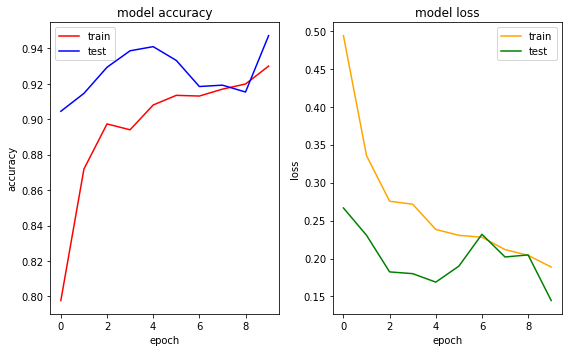

In [30]:
plot_loss(report)

In [31]:
model_momentum = new_model1((80,80,1), 3, 'relu', optimizers.SGD(0.01, momentum=0.9), losses.CategoricalCrossentropy())
report2 = model_momentum.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = model_momentum.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 144s 894ms/step - loss: 0.5988 - accuracy: 0.7325 - val_loss: 0.2123 - val_accuracy: 0.9293
Epoch 2/10
161/161 [==============================] - 143s 887ms/step - loss: 0.3212 - accuracy: 0.8737 - val_loss: 0.1979 - val_accuracy: 0.9262
Epoch 3/10
161/161 [==============================] - 143s 886ms/step - loss: 0.2756 - accuracy: 0.8950 - val_loss: 0.3585 - val_accuracy: 0.8665
Epoch 4/10
161/161 [==============================] - 143s 886ms/step - loss: 0.2859 - accuracy: 0.8924 - val_loss: 0.1878 - val_accuracy: 0.9379
Epoch 5/10
161/161 [==============================] - 142s 886ms/step - loss: 0.2591 - accuracy: 0.8992 - val_loss: 0.2972 - val_accuracy: 0.8750
Epoch 6/10
161/161 [==============================] - 142s 886ms/step - loss: 0.2663 - accuracy: 0.9013 - val_loss: 0.1652 - val_accuracy: 0.9433
Epoch 7/10
161/161 [==============================] - 143s 889ms/step - loss: 0.2332 - accuracy: 0.9108 - val_loss: 0.1651 -

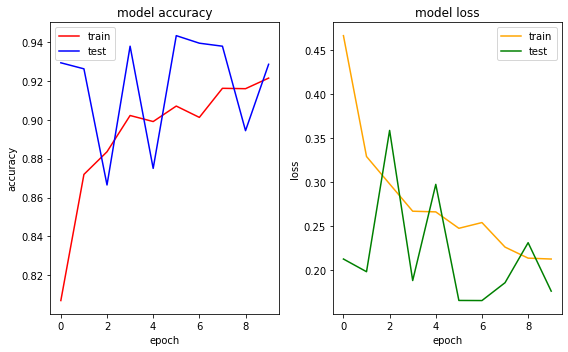

In [32]:
plot_loss(report2)

In [33]:
model_momentum = new_model1((80,80,1), 3, 'relu', optimizers.SGD(0.01, momentum=0.99), losses.CategoricalCrossentropy())
report3 = model_momentum.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = model_momentum.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 144s 894ms/step - loss: 0.7502 - accuracy: 0.6766 - val_loss: 0.2324 - val_accuracy: 0.9200
Epoch 2/10
161/161 [==============================] - 144s 899ms/step - loss: 0.3751 - accuracy: 0.8667 - val_loss: 0.4012 - val_accuracy: 0.7803
Epoch 3/10
161/161 [==============================] - 141s 879ms/step - loss: 0.4424 - accuracy: 0.8335 - val_loss: 0.2434 - val_accuracy: 0.9340
Epoch 4/10
161/161 [==============================] - 141s 877ms/step - loss: 0.4173 - accuracy: 0.8644 - val_loss: 0.3100 - val_accuracy: 0.8595
Epoch 5/10
161/161 [==============================] - 141s 876ms/step - loss: 0.5772 - accuracy: 0.7944 - val_loss: 0.8428 - val_accuracy: 0.6638
Epoch 6/10
161/161 [==============================] - 141s 875ms/step - loss: 0.8487 - accuracy: 0.6552 - val_loss: 0.6551 - val_accuracy: 0.7811
Epoch 7/10
161/161 [==============================] - 142s 881ms/step - loss: 0.8932 - accuracy: 0.6732 - val_loss: 0.8508 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


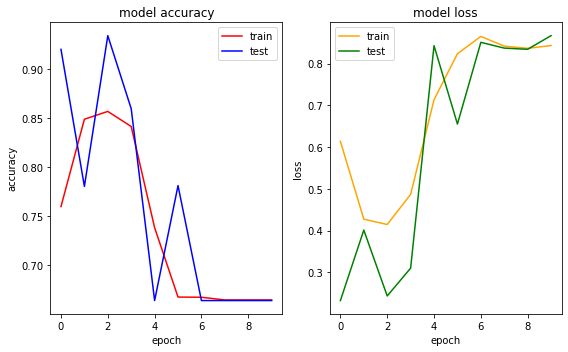

In [34]:
plot_loss(report3)

Higher momentum helps the convergence to happen faster, as it helps the gradient to change in a way that leads to the correct direction. But if we choose the momentum very large (like 0.99), it makes the model take a step that misses the minimum and it makes every thing worse. Because in this case not only the model does not converge to a global minimum, it does not converge to a local minimum either.

## Adam

In [35]:
model_adam = new_model1((80,80,1), 3, 'relu', optimizers.Adam(), losses.CategoricalCrossentropy())
report4 = model_adam.fit(train_data, batch_size=32, epochs=10, validation_data=test_data)
predicted_labels = model_adam.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/10
161/161 [==============================] - 142s 881ms/step - loss: 2.0345 - accuracy: 0.6746 - val_loss: 0.2711 - val_accuracy: 0.9146
Epoch 2/10
161/161 [==============================] - 141s 878ms/step - loss: 0.3206 - accuracy: 0.8760 - val_loss: 0.2816 - val_accuracy: 0.9146
Epoch 3/10
161/161 [==============================] - 141s 875ms/step - loss: 0.2986 - accuracy: 0.8884 - val_loss: 0.2332 - val_accuracy: 0.9076
Epoch 4/10
161/161 [==============================] - 141s 878ms/step - loss: 0.2734 - accuracy: 0.8973 - val_loss: 0.1930 - val_accuracy: 0.9348
Epoch 5/10
161/161 [==============================] - 141s 876ms/step - loss: 0.2773 - accuracy: 0.8997 - val_loss: 0.2267 - val_accuracy: 0.9076
Epoch 6/10
161/161 [==============================] - 141s 876ms/step - loss: 0.2784 - accuracy: 0.9014 - val_loss: 0.1855 - val_accuracy: 0.9309
Epoch 7/10
161/161 [==============================] - 141s 877ms/step - loss: 0.2395 - accuracy: 0.9165 - val_loss: 0.3766 -

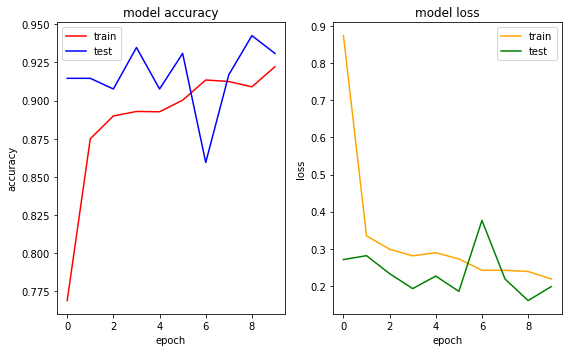

In [36]:
plot_loss(report4)

# 7

## epochs

In [37]:
model = new_model1((80,80,1), 3, 'relu', optimizers.Adam(), losses.CategoricalCrossentropy())
history = model.fit(train_data, batch_size=32, epochs=20, validation_data=test_data)
predicted_labels = model.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/20
161/161 [==============================] - 144s 893ms/step - loss: 1.9089 - accuracy: 0.6589 - val_loss: 0.3666 - val_accuracy: 0.8579
Epoch 2/20
161/161 [==============================] - 145s 903ms/step - loss: 0.3525 - accuracy: 0.8675 - val_loss: 0.2238 - val_accuracy: 0.9216
Epoch 3/20
161/161 [==============================] - 144s 892ms/step - loss: 0.3054 - accuracy: 0.8887 - val_loss: 0.2372 - val_accuracy: 0.9185
Epoch 4/20
161/161 [==============================] - 144s 895ms/step - loss: 0.2552 - accuracy: 0.9070 - val_loss: 0.2572 - val_accuracy: 0.8781
Epoch 5/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2896 - accuracy: 0.8955 - val_loss: 0.1981 - val_accuracy: 0.9301
Epoch 6/20
161/161 [==============================] - 143s 885ms/step - loss: 0.2457 - accuracy: 0.9076 - val_loss: 0.2145 - val_accuracy: 0.9224
Epoch 7/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2485 - accuracy: 0.9072 - val_loss: 0.2205 -

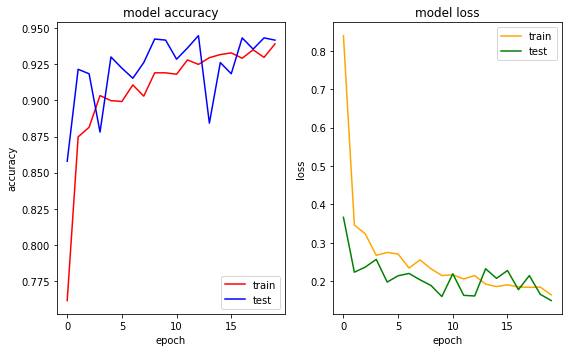

In [38]:
plot_loss(history)

an epoch refers to one cycle through the full training dataset. if we feed a neural network the training data for more than one epoch in different patterns, we hope for a better generalization when given the test data. Hopefully, having several epochs gives the network a chance to see the previous data to readjust the model parameters so that the model is not biased towards the last few data points during training. <br>
there is no guarantee a network will converge by letting it learn the data for larger epochs. usually, "early stopping" is used, meaning using trial and error and stop increasing epochs whenever the accuracy metrics are begining to fall or stop growing.

## 8

## loss

In [40]:
model_mse = new_model1((80,80,1), 3, 'relu', optimizers.Adam(), losses.MeanSquaredError())
history1 = model_mse.fit(train_data, batch_size=32, epochs=20, validation_data=test_data)
predicted_labels = model_mse.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/20
161/161 [==============================] - 145s 897ms/step - loss: 0.2234 - accuracy: 0.6483 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 2/20
161/161 [==============================] - 143s 887ms/step - loss: 0.2263 - accuracy: 0.6605 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 3/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2243 - accuracy: 0.6635 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 4/20
161/161 [==============================] - 142s 886ms/step - loss: 0.2119 - accuracy: 0.6822 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 5/20
161/161 [==============================] - 144s 893ms/step - loss: 0.2216 - accuracy: 0.6676 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 6/20
161/161 [==============================] - 143s 889ms/step - loss: 0.2188 - accuracy: 0.6719 - val_loss: 0.2241 - val_accuracy: 0.6638
Epoch 7/20
161/161 [==============================] - 144s 897ms/step - loss: 0.2243 - accuracy: 0.6636 - val_loss: 0.2241 -

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


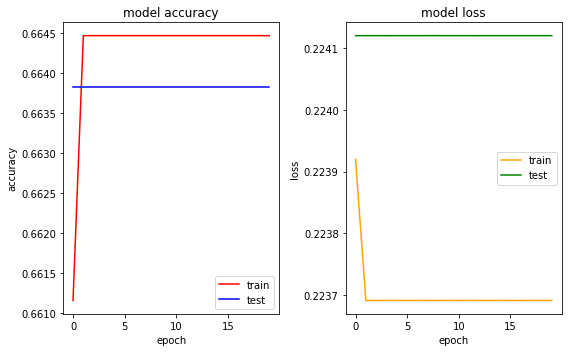

In [41]:
plot_loss(history1)

شکل های فوق نشان می دهند که مدل اساسا چیزی یاد نگرفته است. چرا که از تابعی برای محاسبه خطا استفاده کردیم که میانگین اختلاف لیبل پیش بینی شده و لیبل درست را حساب می کند. در این جا مسئله کلاس بندی است و اختلاف دو کلاس (مثلا کلاس کووید19 و ذات الریه) مفهومی ندارد و کمکی به یادگیری مدل نمی کند.

منطقا جایی باید از این تابع ارور استفاده کنیم که لیبل ها مفهوم عددی داشته باشند تا محاسبه اختلاف آن ها معنادار باشد.

# 9

## regularization

In [42]:
model_l2 = new_model1((80,80,1), 3, 'relu', optimizers.Adam(), losses.CategoricalCrossentropy(), regularize=regularizers.L2(0.0001))
history2 = model_l2.fit(train_data, batch_size=32, epochs=20, validation_data=test_data)
predicted_labels = model_l2.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/20
161/161 [==============================] - 147s 905ms/step - loss: 2.9317 - accuracy: 0.6783 - val_loss: 0.9857 - val_accuracy: 0.7764
Epoch 2/20
161/161 [==============================] - 146s 907ms/step - loss: 0.7885 - accuracy: 0.8774 - val_loss: 0.5664 - val_accuracy: 0.9348
Epoch 3/20
161/161 [==============================] - 145s 902ms/step - loss: 0.6315 - accuracy: 0.8936 - val_loss: 0.5963 - val_accuracy: 0.8734
Epoch 4/20
161/161 [==============================] - 147s 912ms/step - loss: 0.5714 - accuracy: 0.8895 - val_loss: 0.4466 - val_accuracy: 0.9255
Epoch 5/20
161/161 [==============================] - 147s 916ms/step - loss: 0.4881 - accuracy: 0.8980 - val_loss: 0.3803 - val_accuracy: 0.9325
Epoch 6/20
161/161 [==============================] - 148s 920ms/step - loss: 0.4449 - accuracy: 0.9063 - val_loss: 0.3674 - val_accuracy: 0.9247
Epoch 7/20
161/161 [==============================] - 147s 917ms/step - loss: 0.4112 - accuracy: 0.9072 - val_loss: 0.3954 -

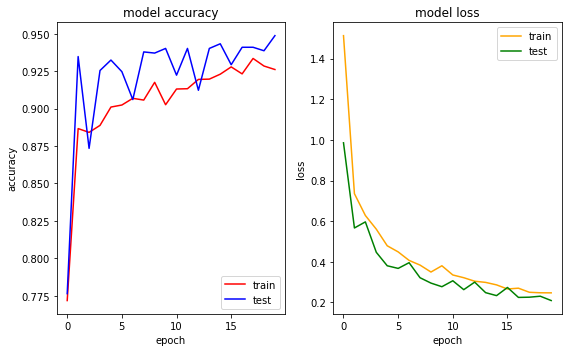

In [43]:
plot_loss(history2)

## dropout

In [44]:
def new_model2(input_shape, output_shape, activation, optimizer, loss, regularize=None):
  inp = layers.Input(input_shape)
  out = layers.Flatten()(inp)
  out = layers.Dense(4000, activation, kernel_regularizer=regularize)(out)
  out = layers.Dropout(0.1)(out)
  out = layers.Dense(2048, activation, kernel_regularizer=regularize)(out)
  out = layers.Dropout(0.1)(out)
  out = layers.Dense(1024, activation, kernel_regularizer=regularize)(out)
  out = layers.Dropout(0.1)(out)
  out = layers.Dense(2048, activation, kernel_regularizer=regularize)(out)
  out = layers.Dropout(0.1)(out)
  out = layers.Dense(output_shape, 'softmax', kernel_regularizer=regularize)(out)

  model = models.Model(inputs=inp, outputs=out)
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [45]:
model_dropout = new_model2((80,80,1), 3, 'relu', optimizers.Adam(), losses.CategoricalCrossentropy())
history3 = model_dropout.fit(train_data, batch_size=32, epochs=20, validation_data=test_data)
predicted_labels = model_dropout.predict(test_data)
true_labels = get_true_label(test_data)
print(classification_report(true_labels, backend.argmax(predicted_labels).numpy()))

Epoch 1/20
161/161 [==============================] - 145s 903ms/step - loss: 1.8774 - accuracy: 0.6646 - val_loss: 0.2888 - val_accuracy: 0.8820
Epoch 2/20
161/161 [==============================] - 144s 895ms/step - loss: 0.3724 - accuracy: 0.8553 - val_loss: 0.2187 - val_accuracy: 0.9193
Epoch 3/20
161/161 [==============================] - 144s 895ms/step - loss: 0.3249 - accuracy: 0.8826 - val_loss: 0.2181 - val_accuracy: 0.9286
Epoch 4/20
161/161 [==============================] - 144s 893ms/step - loss: 0.3197 - accuracy: 0.8905 - val_loss: 0.2892 - val_accuracy: 0.9231
Epoch 5/20
161/161 [==============================] - 143s 892ms/step - loss: 0.3008 - accuracy: 0.8957 - val_loss: 0.2693 - val_accuracy: 0.9154
Epoch 6/20
161/161 [==============================] - 144s 892ms/step - loss: 0.2954 - accuracy: 0.8829 - val_loss: 0.2205 - val_accuracy: 0.9224
Epoch 7/20
161/161 [==============================] - 144s 892ms/step - loss: 0.2832 - accuracy: 0.8990 - val_loss: 0.1879 -

regularization is used to avoid overfitting.

a dropout with rate of 0.1, means approximately 1 out of each 10 neurons is being turned off during training, so the network becomes simpler and it is less likely to overfit.